IMPORTING ALL THE NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df=pd.read_csv("/content/Shill Bidding Dataset.csv")
df

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.000000,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.000000,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.000000,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.000000,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.000000,0.000000,0.001242,0.500000,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6316,15129,760,l***t,0.333333,0.160000,1.0,0.738557,0.280000,0.993593,0.686358,0.888889,3,1
6317,15137,2481,s***s,0.030612,0.130435,0.0,0.005754,0.217391,0.993593,0.000010,0.878788,7,0
6318,15138,2481,h***t,0.055556,0.043478,0.0,0.015663,0.217391,0.993593,0.015663,0.000000,7,0
6319,15139,2481,d***d,0.076923,0.086957,0.0,0.068694,0.217391,0.993593,0.000415,0.000000,7,0


DATASET DESCRIPTION : Online retailer, eBay is providing an option of bidding to their customers globally. Bidding is employed to find the real price of items in the market based on the demand. The price offered by anyone participating in this process is termed as a 'bid'. Normal bids are classified as ‘0’ bids in the data set and anomalous bids as ‘1’. The goal is to use classification or clustering algorithms to predict the bids in the future.

PARANETERS

1.Record ID: Unique identifier of a record in the dataset.

2.Auction ID: Unique identifier of an auction.

3.Bidder ID: Unique identifier of a bidder.

4.Bidder Tendency: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.

5.Bidding Ratio: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.

6.Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.

7.Last Bidding: A shill bidder becomes inactive at the last stage of the auction (more than 90% of the auction duration) to avoid winning the auction.

8.Auction Bids: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.

9.Auction Starting Price: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.

10.Early Bidding: A shill bidder tends to bid pretty early in the auction (less than 25% of the auction duration) to get the attention of auction users.

11.Winning Ratio: A shill bidder competes in many auctions but hardly wins any auctions.

12.Auction Duration: How long an auction lasted.

Class: 0 for normal behaviour bidding; 1 for otherwise.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB



We can see that overall the dataset consists of numerical data with one column represented by 'object' data type. Data size is 6321 rows and 12 columns. We also don't have nay missing values.

In [ ]:
df.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


From the table above we can observe, that values range from 0 to 1 for each feature except Auction_Duration and Auction_ID. Last_Bidding and Auction_Duration seem to follow a normal distribution. Also, I can infer that Winning_Ratio and Successive_Outbidding have lots of observations cluster around either 0 or 1 values. And the dependent variable Class is more represented by 0 class than 1 as mean equals 0.1.

Apply EDA

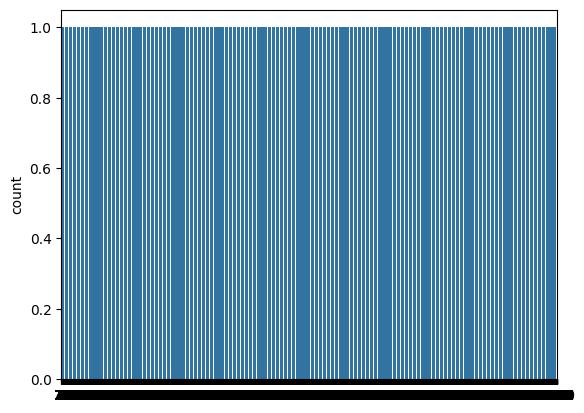

None
Class
0    5646
1     675
Name: count, dtype: int64


In [ ]:
sns.countplot(df['Class'])
print(plt.show())
print(df.Class.value_counts())

With the graph as well as with the value_counts we can confirm that 0 class has 5646 entries while 1 class has only 675 entries.

As the only one object feature we have is a bidder name I want to see if I have any unique values and then decide if we need to keep the f

In [ ]:
df = df.drop(columns='Bidder_ID')

We can observe that we have 1054 unique values.

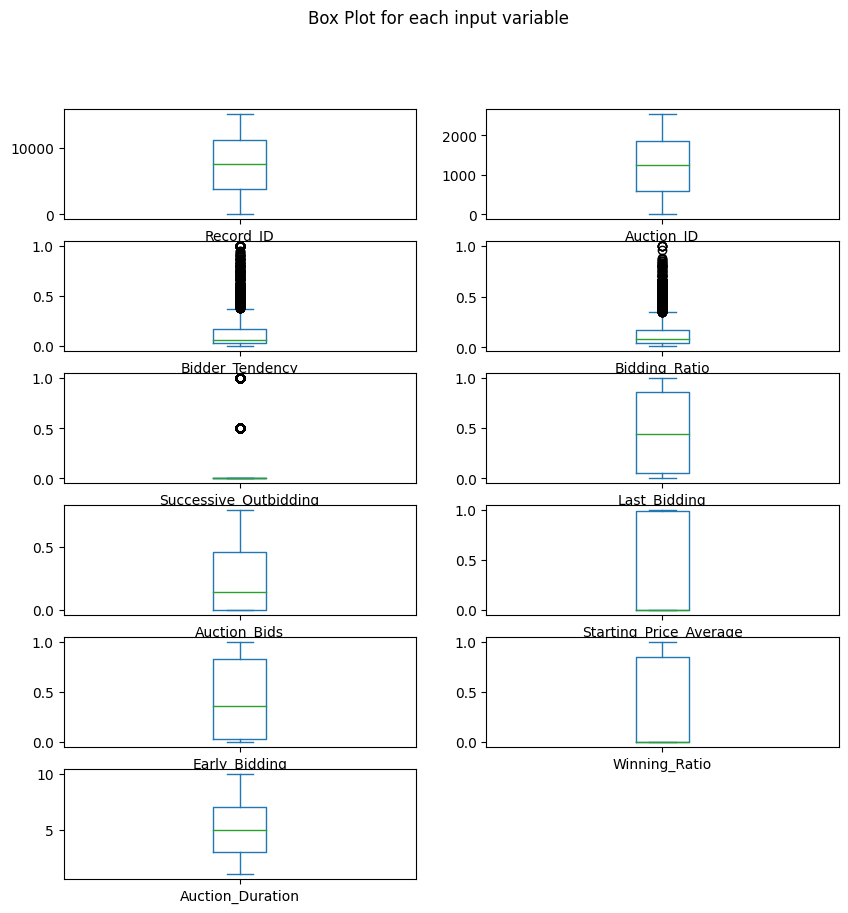

In [ ]:
df.drop('Class', axis=1).plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10,10), title='Box Plot for each input variable')
plt.show()

Bidder_Tendency and Bidding_Ratio have many outliers. Auction_ID, Last_Bidding, Early_Bidding and Auction_Duration have followed normal distribution. It has been infered earlier that Winning_Ratio and Starting_Price_Average have values mostly clustered around 0 and 1. 3rd parameter is Successive_Outbidding as it shows that we migh have outliers.

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Probability Density')

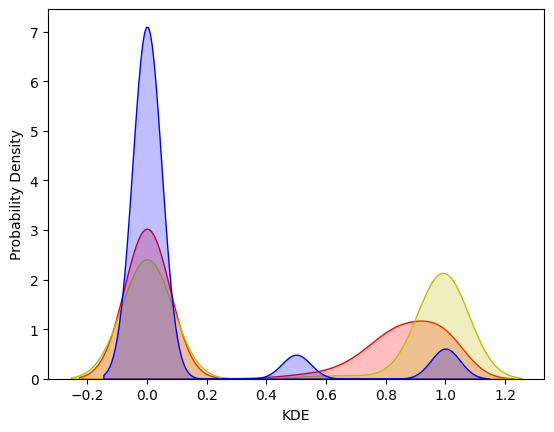

In [ ]:
print(sns.kdeplot(data=df, x='Winning_Ratio', color='r', shade=True))
print(sns.kdeplot(data=df, x='Starting_Price_Average', color='y', shade=True))
print(sns.kdeplot(data=df, x='Successive_Outbidding', color='b', shade=True))

plt.xlabel('KDE')
plt.ylabel('Probability Density')

As for Successive_Outbidding variable, it's not ouliers but data is represented by only 3 values 0, 0.5 and 1. As number of 0 values are drastically higher than 0.5 and 1 it shows the values as outliers.

Successive_Outbidding
0.0    5478
1.0     469
0.5     374
Name: count, dtype: int64
count    6321.000000
mean        0.103781
std         0.279698
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Successive_Outbidding, dtype: float64
Axes(0.125,0.11;0.775x0.77)


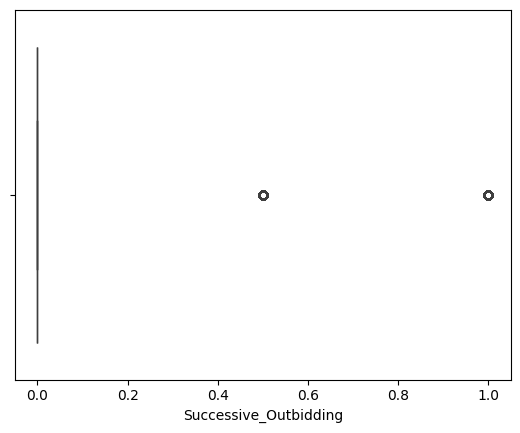

In [ ]:
print(df.Successive_Outbidding.value_counts())
print(df.Successive_Outbidding.describe())
print(sns.boxplot(data=df, x='Successive_Outbidding'))

In [ ]:
X = df.drop(columns = 'Class')
y = df['Class']

In [ ]:
cls = DecisionTreeClassifier()
cls.fit(X, y)

DecisionTreeClassifier()

In [ ]:
importances = cls.feature_importances_
columns = X.columns
columns

Index(['Record_ID', 'Auction_ID', 'Bidder_Tendency', 'Bidding_Ratio',
       'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids',
       'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio',
       'Auction_Duration'],
      dtype='object')

Text(0, 0.5, 'Percentage of importances')

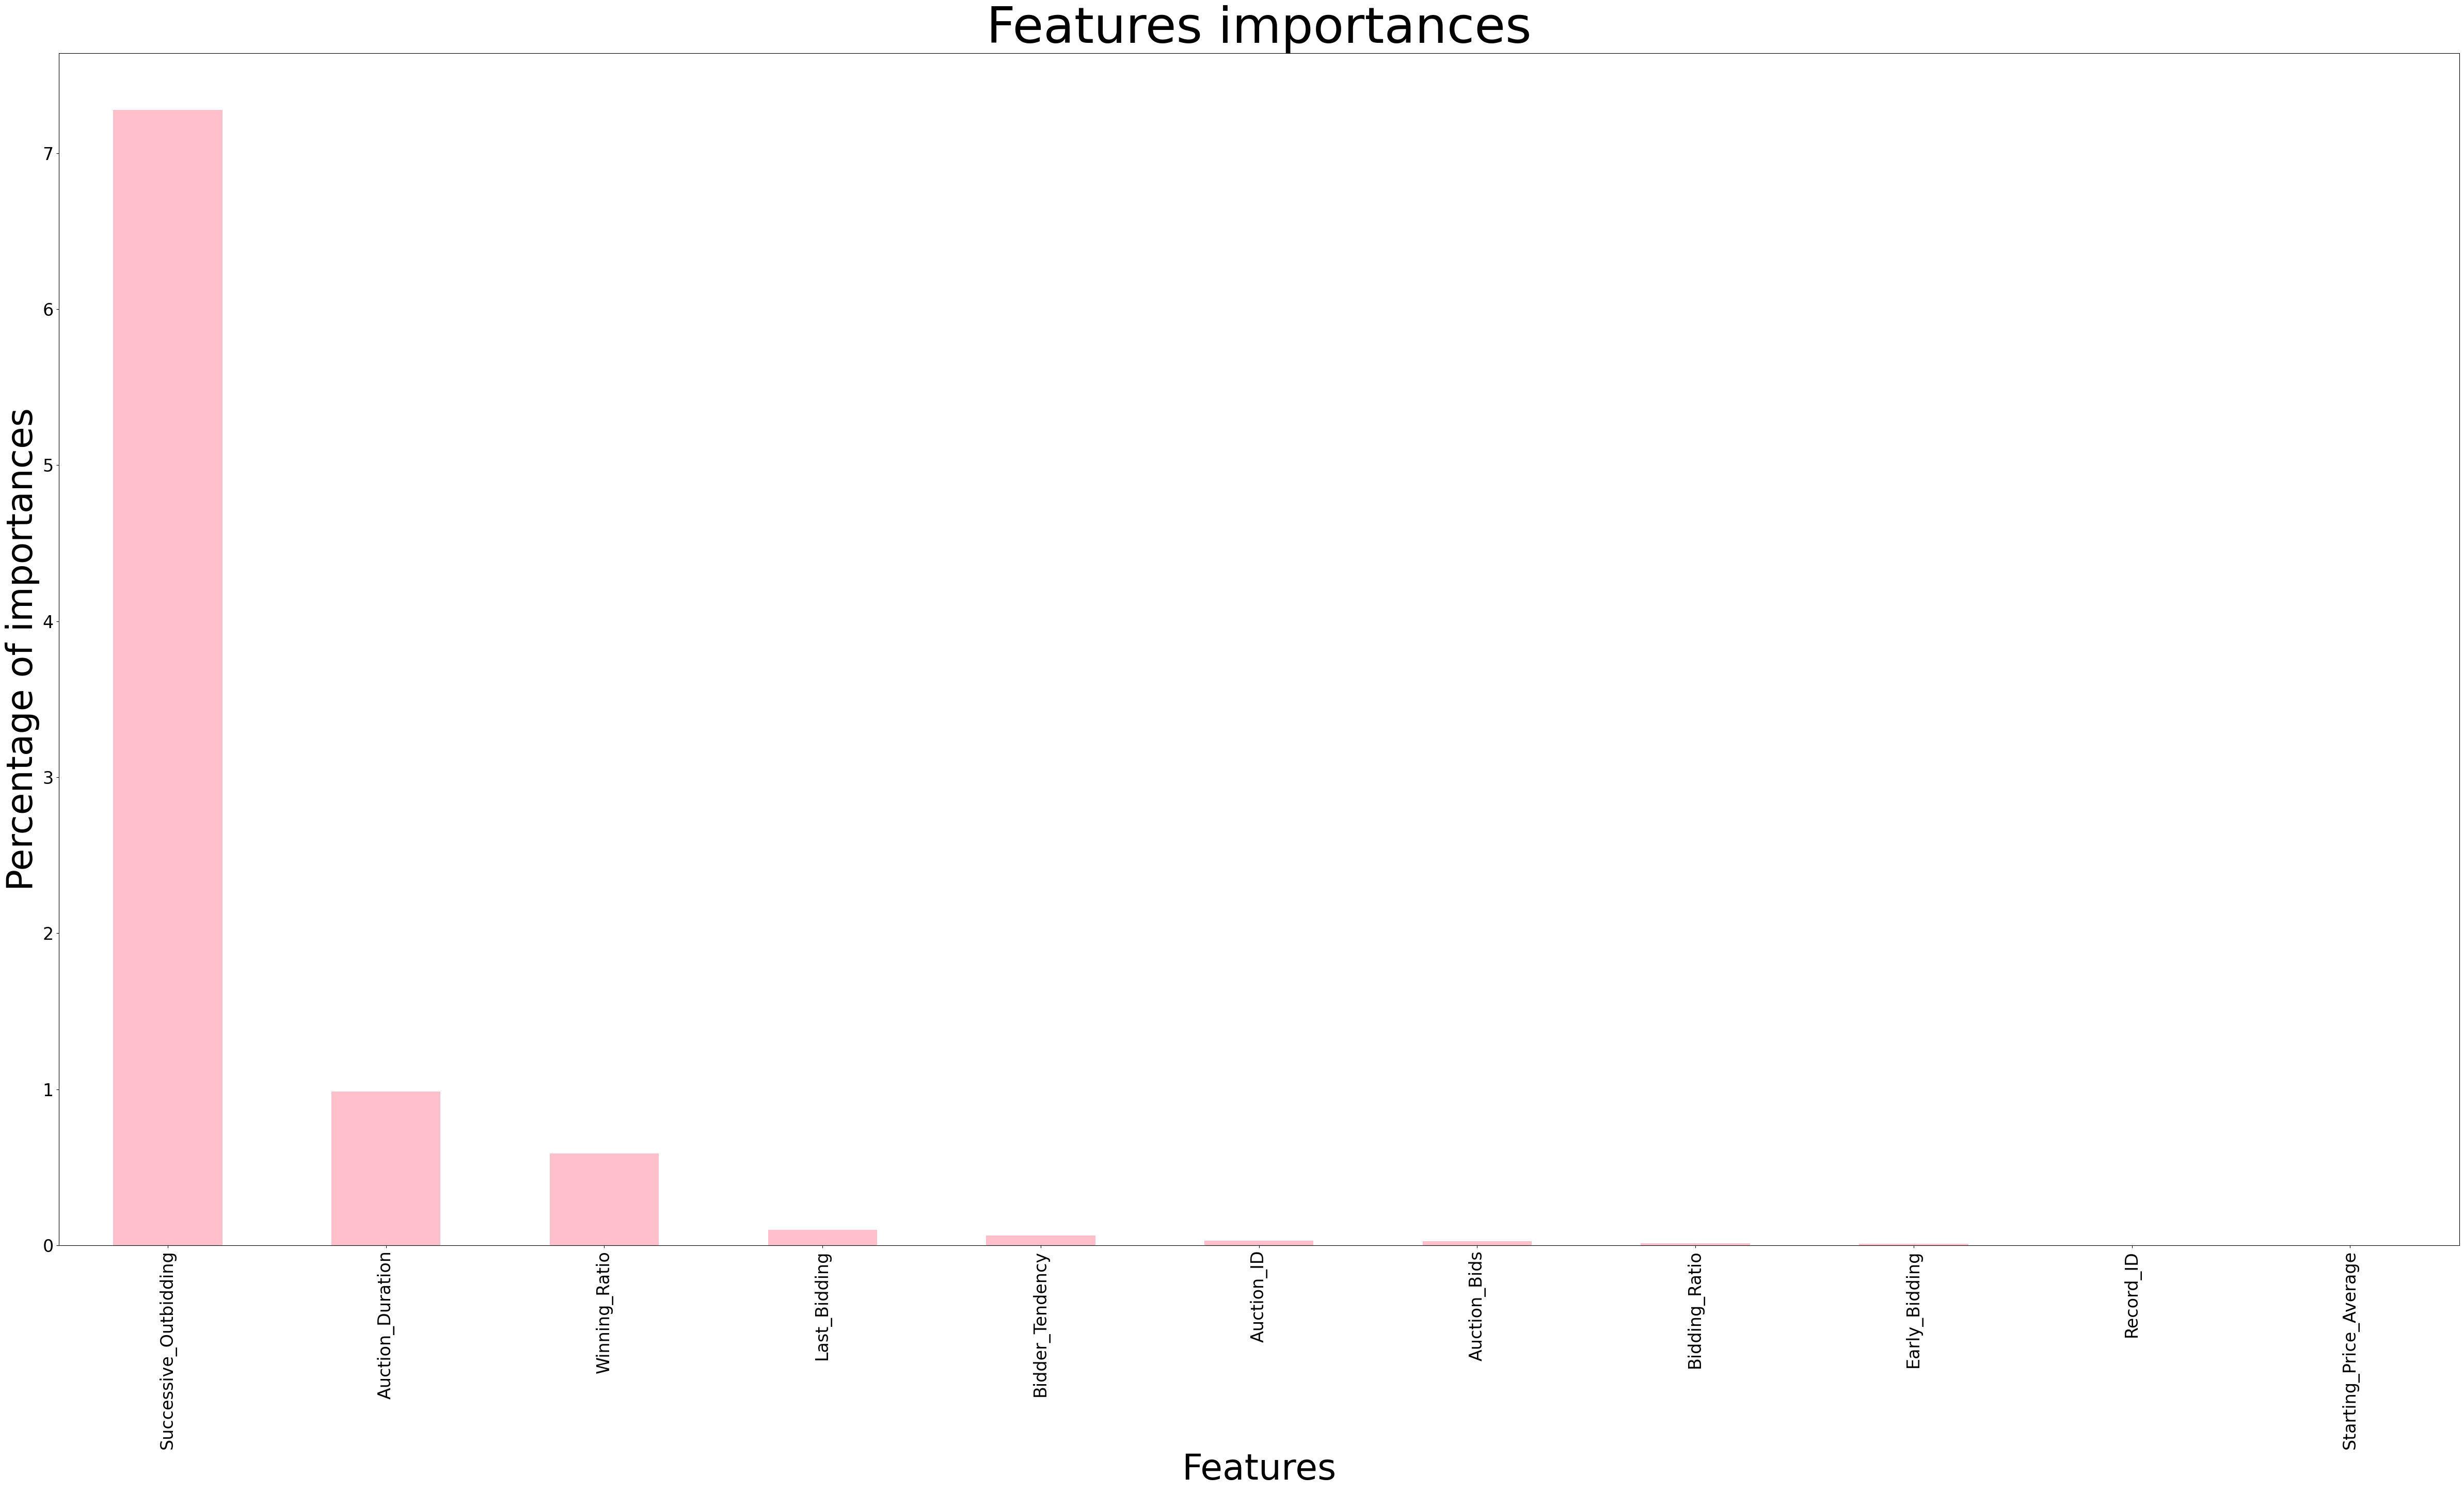

In [ ]:
df_import = pd.DataFrame(importances, columns = ['Feature importances'], index=columns)
df_import['Percentage'] = pd.DataFrame((df_import.sort_values(by= ['Feature importances'], ascending=False)/df_import.shape[0])*100)
pd.options.display.float_format = "{:.2f}".format
df_import=df_import.sort_values(by= ['Percentage'], ascending=False)

# plotting features importances
g = df_import['Percentage'].plot(kind = 'bar', figsize=(60,30), fontsize=24, color = 'pink')
g.set_title('Features importances', fontsize=70)
g.set_xlabel('Features', fontsize=50)
g.set_ylabel('Percentage of importances', fontsize=50)

We see that three the most important features for predicting the target variable are:

Successive_Outbidding; Auction_Duration; Winning_Ratio, and the less important are:

Starting_Price_Average; Auction_ID; Early_Bidding.

CLUSTERING (K MEANS)

In [ ]:
#selecting specific features
features = df[['Successive_Outbidding','Auction_Duration','Winning_Ratio']]

In [ ]:
# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.cluster import KMeans
# Finding the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

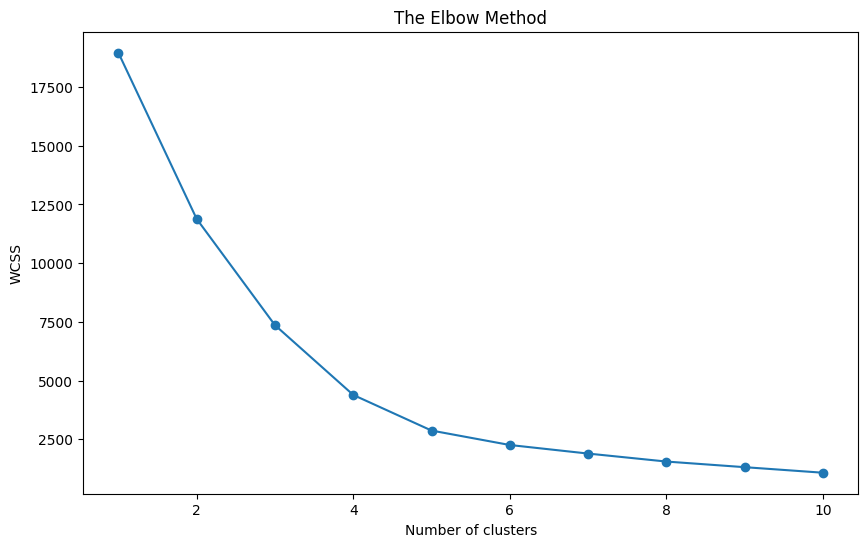

In [ ]:
# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Based on the elbow graph choose an optimal K value
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
labels = kmeans.fit_predict(scaled_features)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Choose the number of clusters (you may need to adjust this)
num_clusters = 5

In [ ]:
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

The silhouette score is a measure of how well-defined clusters are in a clustering algorithm. It ranges from -1 to 1, where a score closer to 1 indicates that the samples are far away from neighboring clusters, and thus the clustering configuration is appropriate. A score around 0 indicates overlapping clusters, and negative scores suggest that samples have been assigned to the wrong clusters.

In [ ]:
# Calculate silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.16456369026819198


The silhouette score of 0.1646 for K-means clustering indicates a moderate level of clustering structure in the data.

In [ ]:
# Adding cluster labels to the original dataframe for analysis
df['Cluster'] = labels

In [ ]:
# Analyzing clusters
print(df.groupby('Cluster').mean())

         Record_ID  Auction_ID  Bidder_Tendency  Bidding_Ratio  \
Cluster                                                          
0          7750.08     1267.08             0.11           0.05   
1          7543.62     1225.33             0.30           0.34   
2          7120.61     1198.71             0.14           0.18   

         Successive_Outbidding  Last_Bidding  Auction_Bids  \
Cluster                                                      
0                         0.01          0.49          0.32   
1                         0.80          0.55          0.26   
2                         0.00          0.37          0.06   

         Starting_Price_Average  Early_Bidding  Winning_Ratio  \
Cluster                                                         
0                          0.59           0.48           0.00   
1                          0.52           0.48           0.85   
2                          0.23           0.31           0.87   

         Auction_Duration  Class

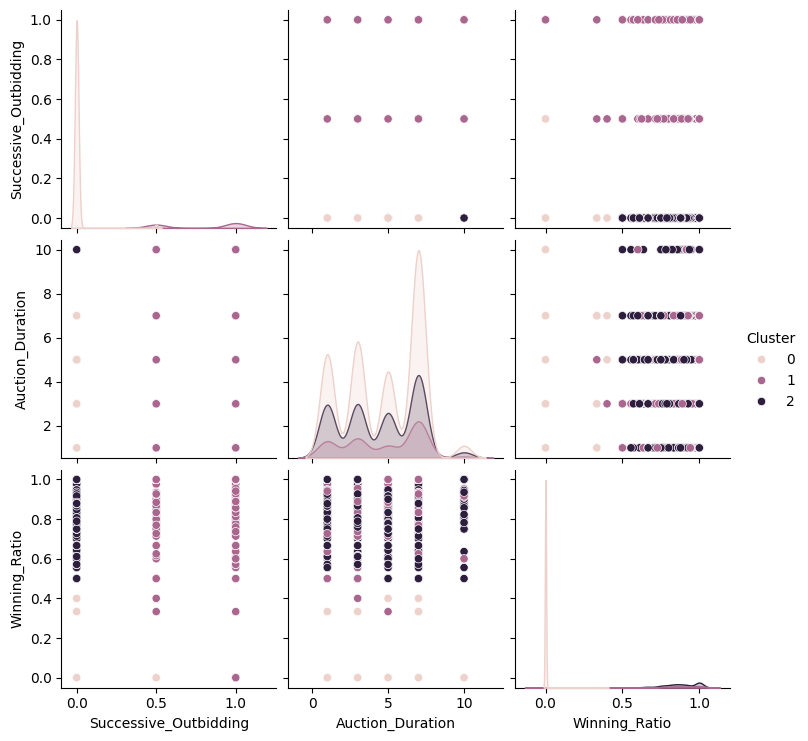

In [ ]:
# Visualizing the clusters for selected features
import seaborn as sns
sns.pairplot(df, hue='Cluster', vars=['Successive_Outbidding','Auction_Duration','Winning_Ratio'])
plt.show()

AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
# Apply Agglomerative Clustering
cluster_model = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = cluster_model.fit_predict(X_scaled)

In [ ]:
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Choose the number of clusters (you may need to adjust this)
num_clusters = 5

In [ ]:
# Apply Agglomerative Clustering
cluster_model = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = cluster_model.fit_predict(X_scaled)

In [ ]:
# Calculate silhouette score to evaluate the quality of clustering
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.12622664555169408


The silhouette score of 0.1262 for Agglomerative Clustering indicates a weak clustering structure in the data, with clusters that are not well-separated or cohesive.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
X = df.drop(columns=["Class"])

In [ ]:
# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Apply Agglomerative clustering
agg_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg_clustering.fit(X_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

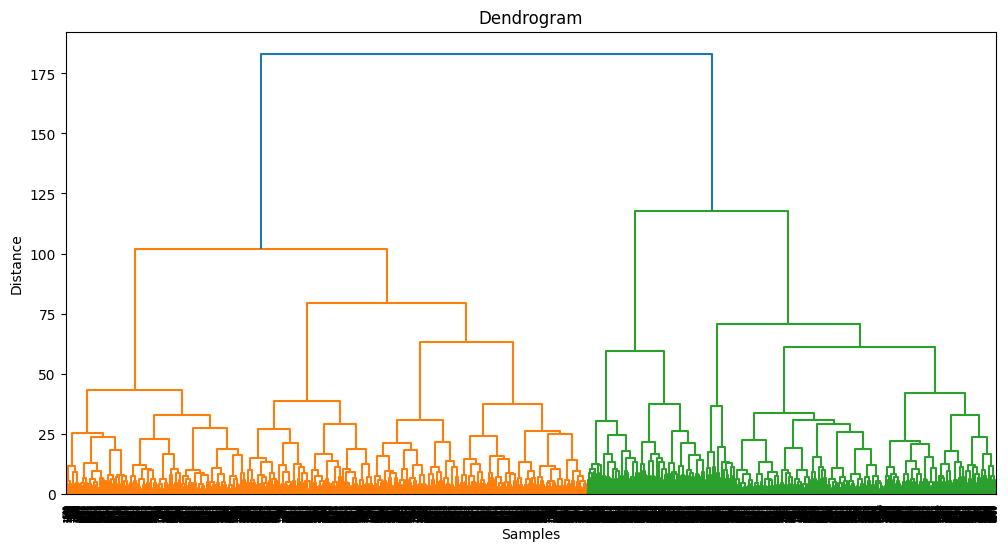

In [ ]:
# Plot dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Perform Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = agg_cluster.fit_predict(scaled_features)

In [ ]:
# Analyze the Clusters
df['Cluster_agg'] = labels
print(df.groupby('Cluster_agg').mean())

             Record_ID  Auction_ID  Bidder_Tendency  Bidding_Ratio  \
Cluster_agg                                                          
0              7739.07     1266.30             0.10           0.05   
1              7137.36     1201.60             0.14           0.19   
2              7574.15     1225.66             0.30           0.32   

             Successive_Outbidding  Last_Bidding  Auction_Bids  \
Cluster_agg                                                      
0                             0.00          0.49          0.31   
1                             0.00          0.37          0.06   
2                             0.78          0.55          0.28   

             Starting_Price_Average  Early_Bidding  Winning_Ratio  \
Cluster_agg                                                         
0                              0.58           0.48           0.00   
1                              0.23           0.31           0.87   
2                              0.54       

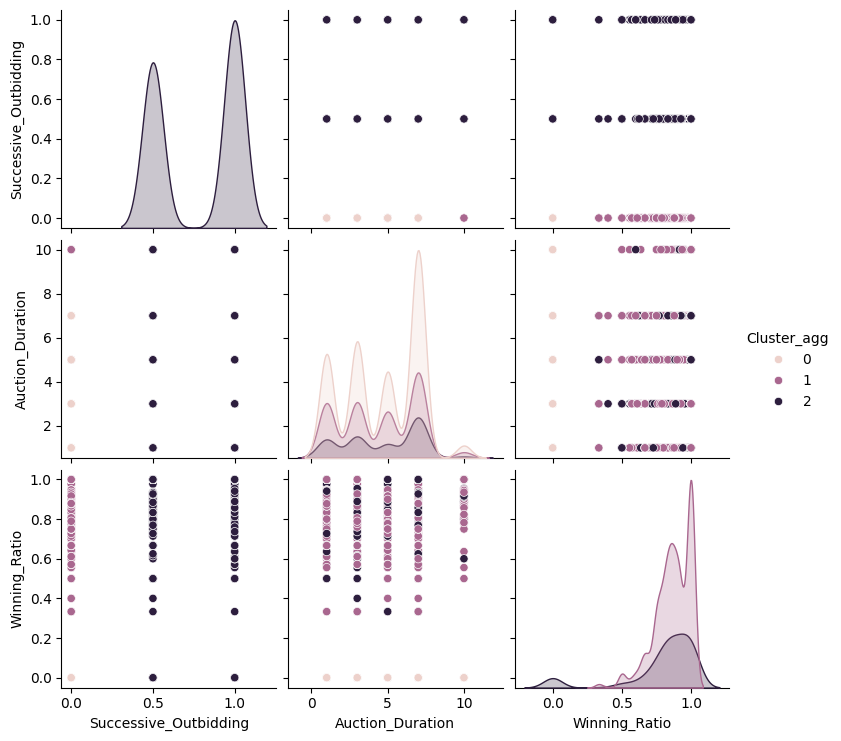

In [ ]:
# Visualization and Interpretation
sns.pairplot(df, hue='Cluster_agg', vars=['Successive_Outbidding','Auction_Duration','Winning_Ratio'])
plt.show()

ANALYSIS :

Silhouette Score Interpretation:

K-means(0.1641):The silhouette score of 0.1646 for K-means clustering indicates a moderate level of clustering structure in the data.

Agglomerative(0.1262): The silhouette score of 0.1262 for Agglomerative Clustering indicates a weak clustering structure in the data, with clusters that are not well-separated or cohesive.

Tips for improvement :

1.Optimize Parameters

2.Feature Engineering

3.Dimensionality Reduction

4.Normalization